# Libraries

In [162]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Loading Dataset

In [163]:
df=sns.load_dataset('tips')

# EDA

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [166]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [167]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [168]:
df.shape

(244, 7)

In [169]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [170]:
df.drop(['sex','smoker','day','time'],axis=1).corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Graphs

In [171]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


<Axes: xlabel='sex', ylabel='Count'>

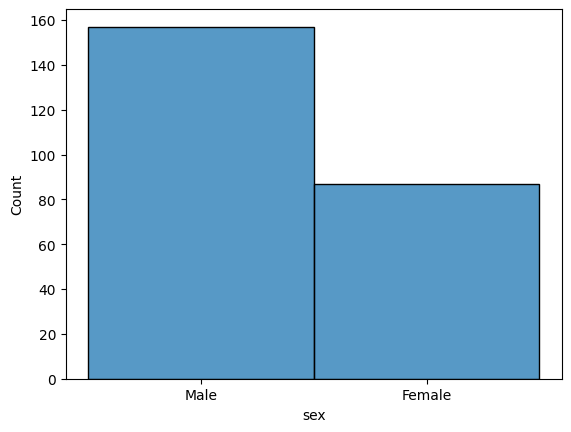

In [172]:
sns.histplot(data=df,x='sex')

<Axes: xlabel='total_bill', ylabel='Count'>

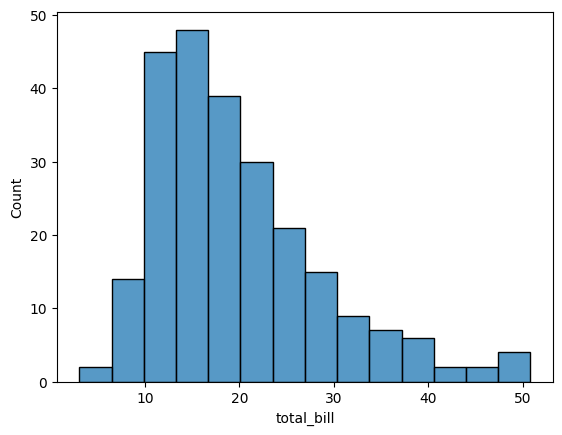

In [173]:
sns.histplot(data=df,x='total_bill')

<Axes: xlabel='tip', ylabel='Count'>

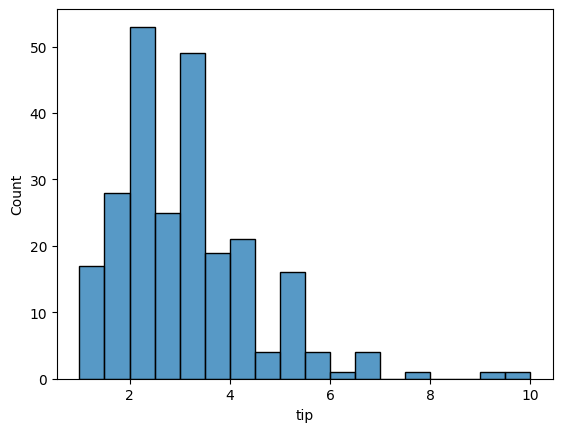

In [174]:
sns.histplot(data=df,x='tip')

<Axes: xlabel='tip', ylabel='total_bill'>

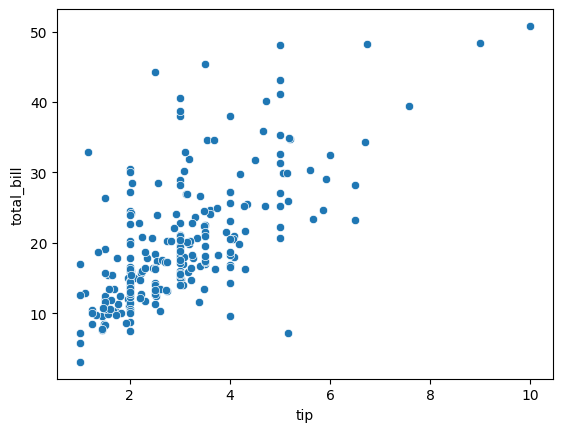

In [175]:
sns.scatterplot(data=df,x='tip',y='total_bill')

# Data Cleaning

In [176]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# Label Encoding

In [177]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#'sex', 'smoker', 'day', 'time'

In [178]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])

# Train-Test Split

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x=df.drop('total_bill',axis=1)
y=df[['total_bill']]

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
sc=StandardScaler()

In [183]:
x=sc.fit_transform(x)

In [184]:
y=sc.fit_transform(y)

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [186]:
x_train.shape

(163, 6)

In [187]:
x_test.shape

(81, 6)

In [188]:
y_train.shape

(163, 1)

In [189]:
y_test.shape

(81, 1)

# Keras (Deep Learning)

In [190]:
import keras
from keras import layers
from keras import ops

In [191]:
# making Deep Learning Model
model = keras.Sequential()
model.add(keras.Input(shape=(6,)))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear')) #linear for regression problem

In [192]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [193]:
#mse- mean square error for regression
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [194]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,verbose="auto",validation_data=(x_test,y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.8100 - mse: 0.8100 - val_loss: 0.8229 - val_mse: 0.8229
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8414 - mse: 0.8414 - val_loss: 0.7783 - val_mse: 0.7783
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8133 - mse: 0.8133 - val_loss: 0.7369 - val_mse: 0.7369
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7341 - mse: 0.7341 - val_loss: 0.7039 - val_mse: 0.7039
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8393 - mse: 0.8393 - val_loss: 0.6765 - val_mse: 0.6765
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6684 - mse: 0.6684 - val_loss: 0.6357 - val_mse: 0.6357
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6230 - mse: 0.6230 - val_loss: 0.6235 - val_mse: 0.6235
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6502 - mse: 0.6502 -

In [195]:
model.evaluate(x=x_test,y=y_test,batch_size=32,verbose="auto")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6257 - mse: 0.6257


[0.602360188961029, 0.602360188961029]

In [196]:
model.predict(x_test,batch_size=32,verbose="auto")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[ 0.0554914 ],
       [-0.19233683],
       [ 0.260882  ],
       [ 1.2859986 ],
       [ 0.3182201 ],
       [-0.5139686 ],
       [ 0.15754372],
       [-0.16895697],
       [ 0.15880284],
       [ 0.06012038],
       [ 0.10200277],
       [-0.68527794],
       [-0.2152819 ],
       [-0.5139686 ],
       [-0.12330871],
       [-0.22485635],
       [ 0.37644032],
       [ 0.34488472],
       [-0.33301702],
       [ 0.4980255 ],
       [ 0.46091637],
       [ 0.31599274],
       [ 0.44103247],
       [-0.69315636],
       [ 0.29421827],
       [-0.03509804],
       [-0.25002193],
       [ 0.68732756],
       [ 0.260882  ],
       [ 1.1603358 ],
       [ 0.4524599 ],
       [-0.7496239 ],
       [ 0.10310882],
       [ 0.21858028],
       [ 0.46984935],
       [ 0.527175  ],
       [-0.7668759 ],
       [ 0.75296384],
       [-0.12166683],
       [-0.46719494],
       [-0.77194136],
       [-0.20977515],
       [ 0.01436345],
       [ 0.24383679],
       [ 0.15854248],
       [-0

In [197]:
y_pred=model.predict(x_test,batch_size=32,verbose="auto")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [202]:
original_values=sc.inverse_transform(y_pred)

In [203]:
original_values

array([[20.278936],
       [18.077194],
       [22.103657],
       [31.210947],
       [22.613058],
       [15.219769],
       [21.185585],
       [18.284903],
       [21.196772],
       [20.32006 ],
       [20.69215 ],
       [13.69783 ],
       [17.873346],
       [15.219769],
       [18.690449],
       [17.788284],
       [23.130295],
       [22.84995 ],
       [16.82737 ],
       [24.210476],
       [23.880793],
       [22.59327 ],
       [23.704142],
       [13.627837],
       [22.399822],
       [19.474127],
       [17.56471 ],
       [25.892263],
       [22.103657],
       [30.09454 ],
       [23.805664],
       [13.126171],
       [20.701977],
       [21.727842],
       [23.960155],
       [24.469444],
       [12.972901],
       [26.475388],
       [18.705036],
       [15.635312],
       [12.927899],
       [17.922268],
       [19.91355 ],
       [21.952225],
       [21.194458],
       [13.483125],
       [17.019379],
       [19.426083],
       [19.717854],
       [18.257257],
